<a href="https://colab.research.google.com/github/ShubhMody/Tensorflow-Developer-Certification-Prep/blob/main/05_Transfer_Learning_In_TensorFlow_Part_2_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning With TensorFlow Part 2: Fine Tuning

In [ ]:
#check if we are using a gpu
!nvidia-smi

Wed Aug 23 20:29:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    31W /  70W |   2951MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Creating helper functions


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-23 20:29:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-08-23 20:29:22 (17.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Lets get some data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-08-23 20:29:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   258MB/s    in 0.6s    

2023-08-23 20:29:23 (258 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
#create training and test directory paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical',
                                                                            batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
#check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.94183693e+01 2.24183693e+01 1.44183683e+01]
   [2.65204086e+01 1.95204086e+01 1.35204105e+01]
   [1.90000000e+01 1.20000000e+01 6.00000048e+00]
   ...
   [6.00000000e+00 9.00000000e+00 1.40000000e+01]
   [5.07141113e+00 8.07141113e+00 1.30714111e+01]
   [5.00000000e+00 8.00000000e+00 1.30000000e+01]]

  [[2.78367310e+01 2.08367310e+01 1.48367319e+01]
   [4.32857132e+01 3.62857132e+01 3.02857132e+01]
   [5.58571472e+01 4.88571472e+01 4.28571472e+01]
   ...
   [6.00000000e+00 9.00000000e+00 1.40000000e+01]
   [5.07141113e+00 8.07141113e+00 1.30714111e+01]
   [5.00000000e+00 8.00000000e+00 1.30000000e+01]]

  [[2.99438763e+01 2.27295914e+01 1.73724480e+01]
   [3.26428604e+01 2.54285698e+01 2.00714283e+01]
   [3.82346916e+01 3.04030609e+01 2.68979588e+01]
   ...
   [6.00000000e+00 9.00000000e+00 1.40000000e+01]
   [5.07141113e+00 8.07141113e+00 1.30714111e+01]
   [5.00000000e+00 8.00000000e+00 1.30000000e+01]]

  ...

  [[1.45285645e+02 1.47071381e+02 1.07071388e+02]
   [1

## Model 0: Building a transfer learning model using functional api

In [ ]:
#1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

#2. Freeze the base model
base_model.trainable = False

#3. Create inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

#4. If using ResNet50V2, you will need to normalize inputs (you dont have to for efficientnet(s))
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"shape after passing inputs through base model: {x.shape}")

#6. Average pool the outputs of the base_model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

#8. Combine the inputs and the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

#9. Compile the model
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#10.Fit the model and save its history
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps = int(0.25 * len(test_data)),
                                 callbacks= [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                         experiment_name = "10_percent_feature_extraction")])


shape after passing inputs through base model: (None, 7, 7, 1280)
shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230823-202929
Epoch 1/5
24/24 [==============================] - 13s 242ms/step - loss: 1.8833 - accuracy: 0.4227 - val_loss: 1.3022 - val_accuracy: 0.7286
Epoch 2/5
24/24 [==============================] - 5s 180ms/step - loss: 1.0949 - accuracy: 0.7680 - val_loss: 0.8820 - val_accuracy: 0.8043
Epoch 3/5
24/24 [==============================] - 5s 188ms/step - loss: 0.8049 - accuracy: 0.8187 - val_loss: 0.7089 - val_accuracy: 0.8339
Epoch 4/5
24/24 [==============================] - 5s 179ms/step - loss: 0.6430 - accuracy: 0.8467 - val_loss: 0.6138 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 5s 154ms/step - loss: 0.5531 - accuracy: 0.8813 - val_loss: 0.5474 - val_accuracy: 0.8684


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 75ms/step - loss: 0.5538 - accuracy: 0.8656


[0.5538201332092285, 0.8655999898910522]

In [ ]:
#check the layers in our base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_4
1 rescaling_6
2 normalization_3
3 rescaling_7
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_6 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_6[0][0]']            
 )                              3)                                                   

In [ ]:
model_0.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


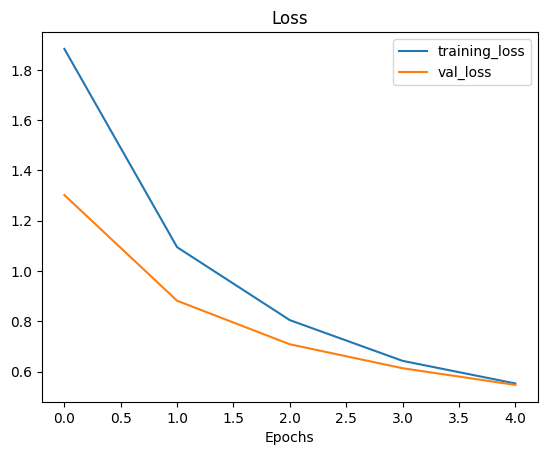

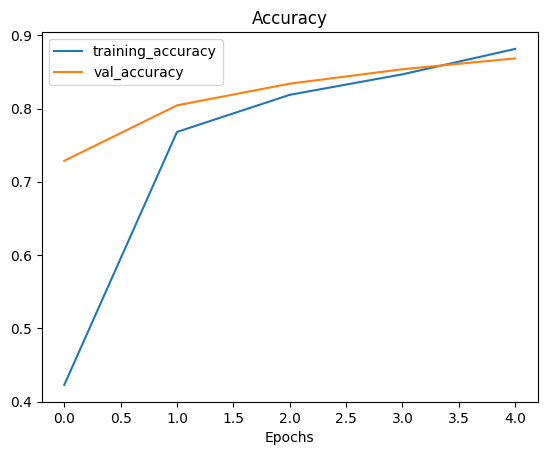

In [ ]:
#Check out our model's training curves
plot_loss_curves(history_10_percent)

## Getting a feature vector from a trained model

In [ ]:
# Define input tensor shape (same number of dimensions as the output of efficientnetb0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


You can see the tf.keras.layers.GlobalAveragePooling2D() layer condensed the input tensor from shape (1, 4, 4, 3) to (1, 3). It did so by averaging the input_tensor across the middle two axes.

We can replicate this operation using the tf.reduce_mean() operation and specifying the appropriate axes.

In [ ]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

Doing this not only makes the output of the base model compatible with the input shape requirement of our output layer (tf.keras.layers.Dense()), it also condenses the information found by the base model into a lower dimension feature vector.

## Running a series of transfer learning experiments

1. model_1: Use feature extraction transfer learning on 1% of the training data with data augmentation.
2. model_2: Use feature extraction transfer learning on 10% of the training data with data augmentation.
3. model_3: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
4. model_4: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

### Getting and preprocessing data for model_1

In [ ]:
#Download and unzip data - pre-processed from Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-08-23 20:30:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   176MB/s    in 0.7s    

2023-08-23 20:30:19 (176 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
#Create Training and Test dirs
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [ ]:
#How many images are we working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'

In [ ]:
#Set up data loaders
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = 'categorical',
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation into the model


Previously we've used the different parameters of the ImageDataGenerator class to augment our training images, this time we're going to build data augmentation right into the model.

How?

Using the tf.keras.layers.experimental.preprocessing module and creating a dedicated data augmentation layer.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
    # layers.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name = "data_augmentation")


### Visualize our data augmentation layer (and see what happens to our data)



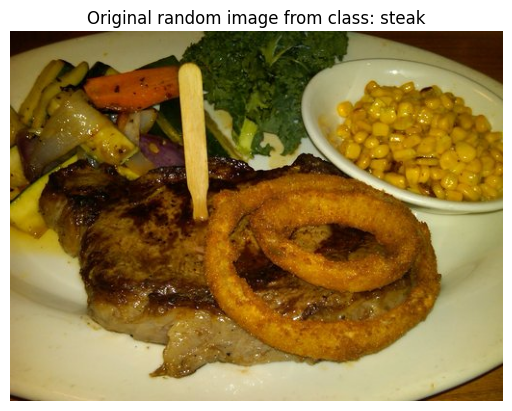

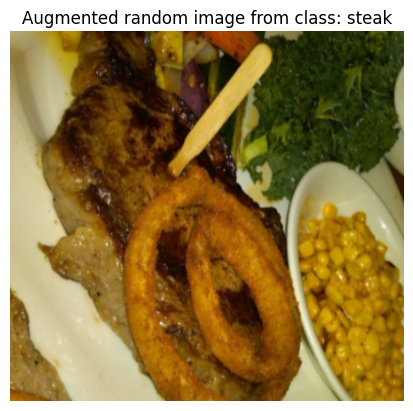

In [ ]:
#View a random image and compare its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

#read and plot in the random image
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

## Model 1: Feature Extraction transfer learning on 1% of the training data

In [ ]:
#set up input shape
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

#create input layer
inputs = layers.Input(shape = input_shape, name = "input_layer")

#add in data augmnetation sequential model as a layer
x = data_augmentation(inputs)

#give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training = False)

#pool the output features of the base_model
x = layers.GlobalAveragePooling2D(name = "Global_Average_Pooling_Layer")(x)

#Put a Dense layer on as the ouptut
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)

#Make a model using inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                           experiment_name = "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230823-203026
Epoch 1/5
3/3 [==============================] - 12s 2s/step - loss: 2.3619 - accuracy: 0.0857 - val_loss: 2.1337 - val_accuracy: 0.2434
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1297 - accuracy: 0.2429 - val_loss: 2.0050 - val_accuracy: 0.3141
Epoch 3/5
3/3 [==============================] - 6s 3s/step - loss: 1.9257 - accuracy: 0.4000 - val_loss: 1.8743 - val_accuracy: 0.4293
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7369 - accuracy: 0.5857 - val_loss: 1.7708 - val_accuracy: 0.5033
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.5421 - accuracy: 0.7286 - val_loss: 1.6671 - val_accuracy: 0.5576


In [ ]:
# Check out model summary
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_Average_Pooling_Laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
# Evaluate on the test data
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 7s 79ms/step - loss: 1.6883 - accuracy: 0.5364


[1.6883023977279663, 0.5364000201225281]

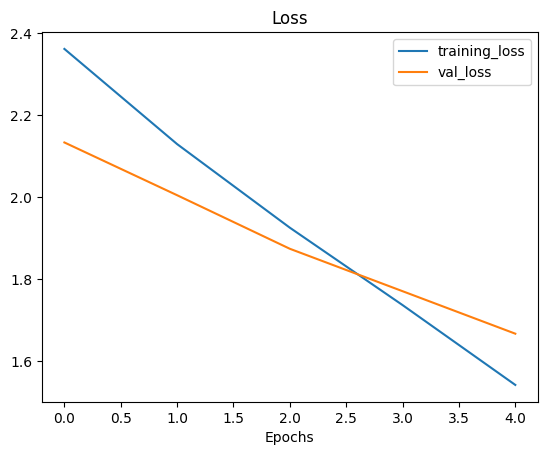

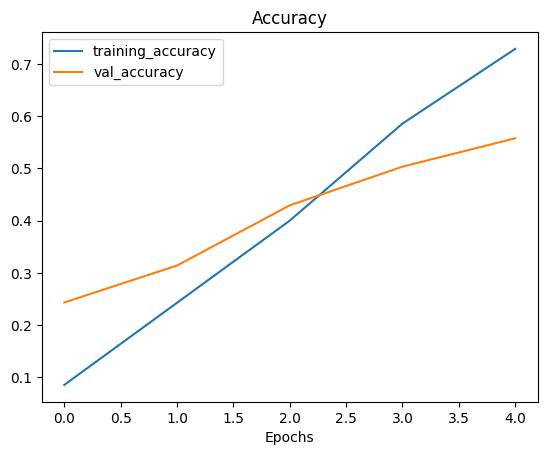

In [ ]:
# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1_percent)

## Model 2: Feature extraction transfer learning with 10% of data and data augmentation

In [ ]:
# Get 10% of the data of the 10 classes (uncomment if you haven't gotten "10_food_classes_10_percent.zip" already)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

--2023-08-23 20:31:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M   240MB/s    in 0.7s    

2023-08-23 20:31:05 (240 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Note: the test data is the same as the previous experiment, we could
# skip creating this, but we'll leave this here to practice.
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers.experimental import preprocessing # OLD

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

## OLD
# # Build data augmentation layer
# data_augmentation = Sequential([
#   preprocessing.RandomFlip('horizontal'),
#   preprocessing.RandomHeight(0.2),
#   preprocessing.RandomWidth(0.2),
#   preprocessing.RandomZoom(0.2),
#   preprocessing.RandomRotation(0.2),
#   # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
# ], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])


## Creating a ModelCheckpoint callback

In [ ]:
#Set checkpoint path
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"

#Create a ModelCheckPoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch", #save every epoch
                                                         verbose = 1)


### Fit the model 2 passing in the ModelCheckpoint Callback


In [ ]:
#Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs = initial_epochs,
                                          validation_data = test_data,
                                          validation_steps = int(0.25 * len(test_data)),
                                          callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                   experiment_name = "10_percent_data_aug"),
                                                       checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230823-203113
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0232 - accuracy: 0.3267
Epoch 1: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 515ms/step - loss: 2.0232 - accuracy: 0.3267 - val_loss: 1.4380 - val_accuracy: 0.6875
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2853 - accuracy: 0.7200
Epoch 2: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 402ms/step - loss: 1.2853 - accuracy: 0.7200 - val_loss: 1.0083 - val_accuracy: 0.7714
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9892 - accuracy: 0.7733
Epoch 3: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 449ms/step - loss: 0.9892 - accuracy: 0.7733 - val_loss: 0.7768 - val_accuracy: 0.8158
Epoc

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 0.5538 - accuracy: 0.8656


[0.5538200736045837, 0.8655999898910522]

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.6199 - accuracy: 0.8408


[0.6199204325675964, 0.8407999873161316]

In [ ]:
#check model_2 result on all test_data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 11s 129ms/step - loss: 0.6199 - accuracy: 0.8408


[0.6199201941490173, 0.8407999873161316]

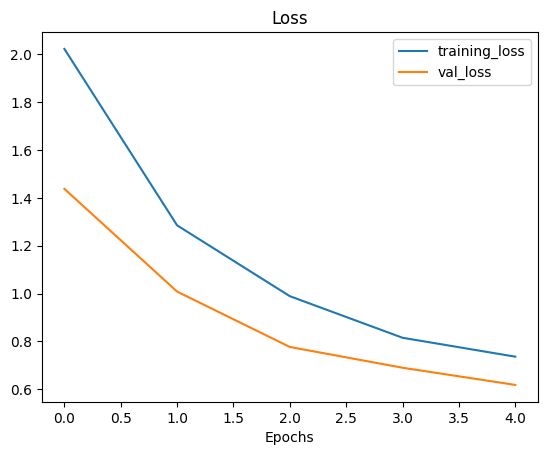

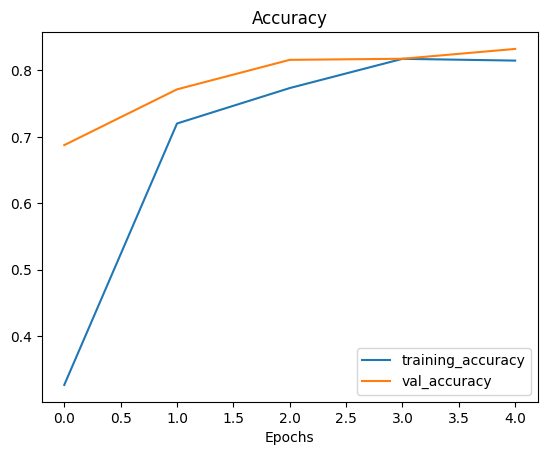

In [ ]:
#plot model loss curves
plot_loss_curves(history_10_percent_data_aug)

### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint.

In [ ]:
#Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
#Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)
loaded_weights_model_results

79/79 [==============================] - 11s 116ms/step - loss: 0.6199 - accuracy: 0.8408


[0.6199203729629517, 0.8407999873161316]

In [ ]:
results_10_percent_data_aug == loaded_weights_model_results

False

In [ ]:
#check to see if the loaded results are very close to our previous non loaded model results
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))


array([ True,  True])

In [ ]:
#check the difference between the 2 results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-1.78813934e-07  0.00000000e+00]


Model 3: Fine-tuning an existing model on 10% of the data

In [ ]:
#Lets check the layers in our model_2
model_2.layers

In [ ]:
#are these layers trainable?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7dec80db1a80> True
<keras.engine.sequential.Sequential object at 0x7dec80d57a00> True
<keras.engine.functional.Functional object at 0x7decb07eb4f0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7dec7cbcb070> True
<keras.layers.core.dense.Dense object at 0x7dec8379f130> True


In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7dec80d56da0> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7dec80d55f00> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7dec80d56e30> False
3 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7dec4f23eda0> False
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7dec80d364d0> False
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x7dec80d34d60> False
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7dec80d359c0> False
7 <keras.layers.core.activation.Activation object at 0x7dec80d357b0> False
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7dec80d35cc0> False
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7dec80d346d0> False
10 <keras.layers.core.activation.Activation object at 0x7dec834ee1a0> False
11 <keras.layers.pooling.global_average_pool

In [ ]:
#How many trainable models are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


To begin fine-tuning, we'll unfreeze the entire model_2_base_model by setting its trainable attribute to True.

Then we'll refreeze every layer in model_2_base_model except for the last 10 by looping through them and setting their trainable attribute to False.

Finally, we'll recompile the whole model.

In [ ]:
base_model.trainable = True

#Freeze all the layers except last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

#Recompile our model everytime we make a change
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),  # lr is 10x lower than before for fine-tuning
                metrics = ["accuracy"])



In [ ]:
#Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
#How many trainable variables do we have now?
print(len(model_2.trainable_variables))

12


In [ ]:
#Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

#Refit the model
history_fine_10_percent_data_aurg = model_2.fit(train_data_10_percent,
                                                epochs = fine_tune_epochs,
                                                validation_data = test_data,
                                                validation_steps = (0.25 * len(test_data)),
                                                initial_epoch = history_10_percent_data_aug.epoch[-1], #start training from previous last epoch
                                                callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                         experiment_name = "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230823-203321
Epoch 5/10
24/24 [==============================] - 21s 439ms/step - loss: 0.6130 - accuracy: 0.8227 - val_loss: 0.4919 - val_accuracy: 0.8500
Epoch 6/10
24/24 [==============================] - 8s 326ms/step - loss: 0.4633 - accuracy: 0.8720 - val_loss: 0.4453 - val_accuracy: 0.8469
Epoch 7/10
24/24 [==============================] - 10s 385ms/step - loss: 0.4252 - accuracy: 0.8760 - val_loss: 0.4561 - val_accuracy: 0.8531
Epoch 8/10
24/24 [==============================] - 8s 337ms/step - loss: 0.3765 - accuracy: 0.8907 - val_loss: 0.4439 - val_accuracy: 0.8672
Epoch 9/10
24/24 [==============================] - 7s 292ms/step - loss: 0.3266 - accuracy: 0.9053 - val_loss: 0.4458 - val_accuracy: 0.8562
Epoch 10/10
24/24 [==============================] - 10s 370ms/step - loss: 0.3199 - accuracy: 0.9000 - val_loss: 0.4558 - val_accuracy: 0.8594


In [ ]:
#Evaluate the fine-tuned model (modek_3 which is actually model_2 fine-tuned for another epochs)
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 0.4336 - accuracy: 0.8604


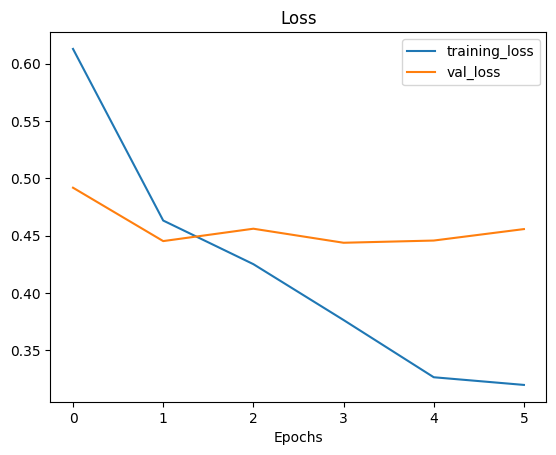

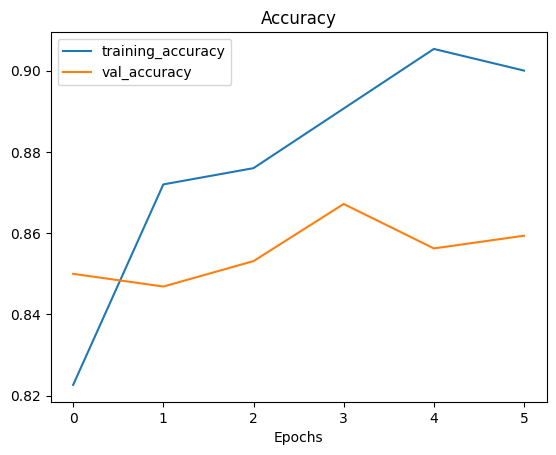

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aurg)

In [ ]:
#function to compare training histories
def compare_historys(original_history, new_history, initial_epochs = 5):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  #combine original history
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  #For loss
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

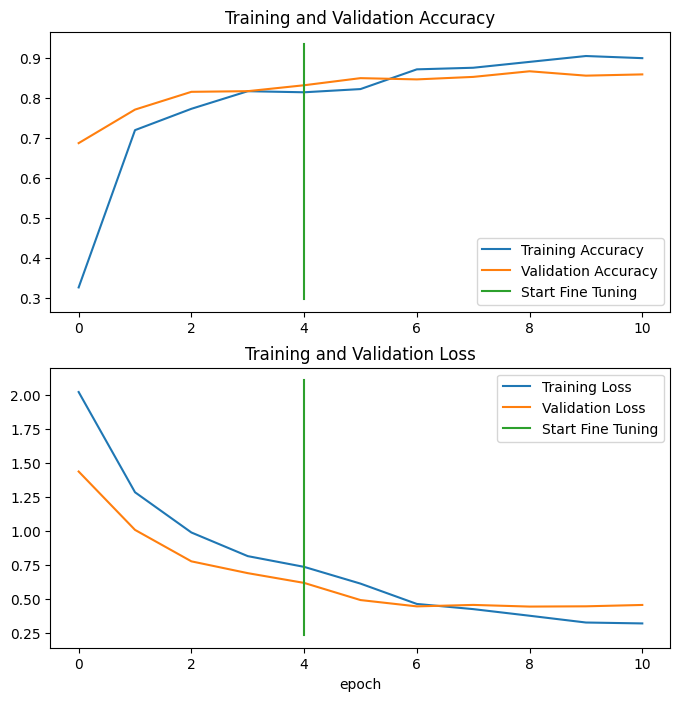

In [ ]:
compare_historys(history_10_percent_data_aug, history_fine_10_percent_data_aurg,
                 initial_epochs = 5)

## Model - 4: Fine Tuning Existing Model on all of th data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-08-23 20:34:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  66.9MB/s    in 6.1s    

2023-08-23 20:34:43 (81.3 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
#seyup training anfd test dir
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [ ]:
#set up data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode = "categorical",
                                                                                 image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#Evaluate model 2 (this is the fine tund on 10 percent of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 8s 92ms/step - loss: 0.4336 - accuracy: 0.8604


[0.43364647030830383, 0.8604000210762024]

In [ ]:
results_fine_tune_10_percent

[0.43364638090133667, 0.8604000210762024]

In [ ]:
#Lets evaluate model 2 now
model_2.evaluate(test_data)

79/79 [==============================] - 10s 109ms/step - loss: 0.6199 - accuracy: 0.8408


[0.6199201941490173, 0.8407999873161316]

In [ ]:
results_10_percent_data_aug

[0.6199201941490173, 0.8407999873161316]

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs = fine_tune_epochs,
                                           validation_data = test_data,
                                           validation_steps = int(0.25 * len(test_data)),
                                           initial_epoch = history_10_percent_data_aug.epoch[-1],
                                           callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                    experiment_name = "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer=learning/full_10_classes_fine_tune_last_10/20230823-204818


Epoch 5/10
235/235 [==============================] - 72s 262ms/step - loss: 0.6381 - accuracy: 0.7997 - val_loss: 0.3166 - val_accuracy: 0.8964
Epoch 6/10
235/235 [==============================] - 55s 231ms/step - loss: 0.5140 - accuracy: 0.8371 - val_loss: 0.3058 - val_accuracy: 0.9013
Epoch 7/10
235/235 [==============================] - 55s 231ms/step - loss: 0.4616 - accuracy: 0.8536 - val_loss: 0.2942 - val_accuracy: 0.8947
Epoch 8/10
235/235 [==============================] - 56s 238ms/step - loss: 0.4162 - accuracy: 0.8683 - val_loss: 0.2828 - val_accuracy: 0.9112
Epoch 9/10
235/235 [==============================] - 57s 241ms/step - loss: 0.3758 - accuracy: 0.8797 - val_loss: 0.2751 - val_accuracy: 0.9079
Epoch 10/10
235/235 [==============================] - 52s 219ms/step - loss: 0.3529 - accuracy: 0.8860 - val_loss: 0.2339 - val_accuracy: 0.9161


In [ ]:
#lets evaluate on all data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 70ms/step - loss: 0.2672 - accuracy: 0.9132


[0.2671841084957123, 0.9132000207901001]

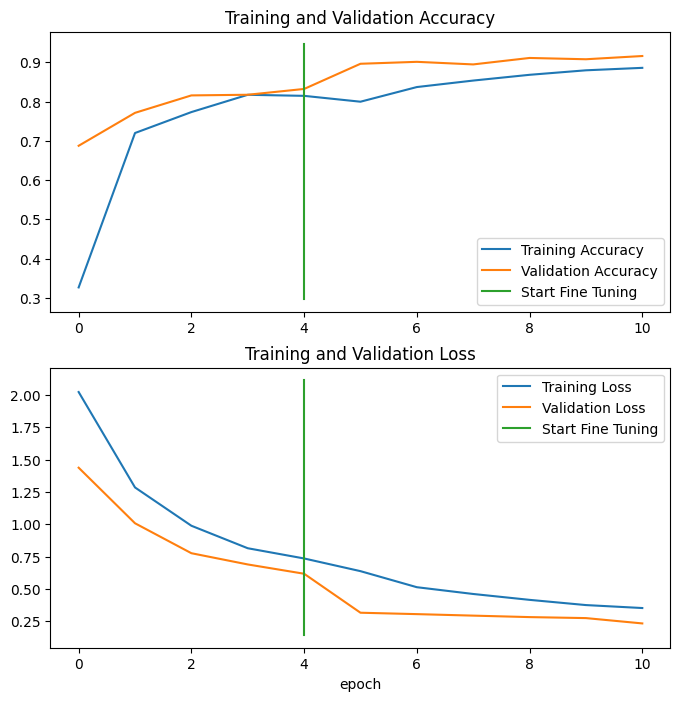

In [ ]:
compare_historys(original_history = history_10_percent_data_aug,
                 new_history = history_fine_10_classes_full)

## Viewing our experiments data on TensorBoard

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 Food101 Classes" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning." \
  --one_shot # exits the uploader once its finished uploading

View your TensorBoard at https://tensorboard.dev/experiment/Xbgdqk3mQxW0x37QRHLVuA/

## View All of your uploaded tensorflow experiment

In [ ]:
!tensorboard dev list

2023-08-23 21:05:56.034071: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/Xbgdqk3mQxW0x37QRHLVuA/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning.
	Id                   Xbgdqk3mQxW0x37QRHLVuA
	Created              2023-08-23 21:01:24 (4 minutes ago)
	Updated              2023-08-23 21:01:32 (4 minutes ago)
	Runs                 16
	Tags                 5
	Scalars              252
	Tensor bytes         0
	Binary object bytes  7256741
Total: 1 experiment(s)


#To delete an experiment
Run This -> !tensorboard dev delete --experiment_id Xbgdqk3mQxW0x37QRHLVuA